In [1]:
# import nltk
# nltk.download("stopwords")

In [1]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from IPython import display
import time

from pyspark.sql import SparkSession
from pyspark.sql import functions as F

In [2]:
spark = SparkSession.builder.master("local[*]").appName("WordCloud").getOrCreate()

23/01/29 12:55:57 WARN Utils: Your hostname, FLNNOTFS033753 resolves to a loopback address: 127.0.1.1; using 192.168.15.12 instead (on interface enp1s0)
23/01/29 12:55:57 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/01/29 12:55:59 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [9]:
def trata_tweets(df):
    patterns = r"http\S+|@\w+|rt"
    return (
        df
        .select(F.explode(F.split(F.lower("_c0"), " ")).alias("word"))
        .withColumn("word", F.regexp_replace("word", patterns, ""))
        .na.replace("", None)
        .na.drop()
    )

In [15]:
stops = stopwords.words("portuguese")

stops.append("lula")
stops.append("pra")

plt.figure(figsize=(20, 10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

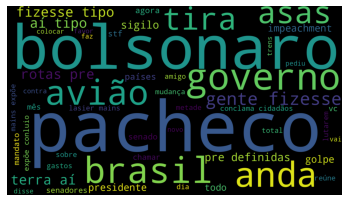

In [16]:
while True:
    try:
        words = spark.read.csv("./csv", encoding="utf-8")
        words = trata_tweets(words)
        rows = words.collect()
        all_words = ""
        for row in rows:
            all_words += " " + row["word"]
        wordcloud = WordCloud(stopwords=stops, background_color="black", width=1920, height=1080, max_words=50)
        wordcloud.generate(all_words)
        plt.cla()
        plt.axis("off")
        plt.imshow(wordcloud)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(5)
    except KeyboardInterrupt:
        break

In [5]:
spark.stop()